In [1]:
import numpy as np

In [2]:
import numpy_financial as npf

# Dane:

In [166]:
freq = 12
rate = 0.05
rate_year = 0.05
years = 5
apartment = 120000
b_rate = 0.12
b_rate /= freq


rate /= freq  # konwersja stopy do okresu miesięcznego
nper = years * freq  # liczba wszystkich okresów

# Funkcje

In [164]:
def future_apartament_price(freq,rate,years,apartament):
    rate /= freq  # konwersja stopy do okresu miesięcznego
    nper = years * freq  # liczba wszystkich okresów
    periods = np.arange(1,nper+1,dtype=int) # tablica wszystkich okresów
    fa_price = np.around(periods*apartament*rate + apartament,2) # tabela spodziewanego miesięcznego wzrostu ceny mieszkania (future apatament price)
    print("Cena mieszkania za 5 lat to: " + str(fa_price[-1])) # spodziewana cana mieszkania (ostatni okres)
    
    return fa_price
    

In [191]:
def find_monthly_rate(freq,rate,years,fa_price,rate_min,rate_max):
    n = np.arange(rate_min,rate_max) # tworzę tablicę wartości podanych przedziałów spodziewanej miesięcznej raty
    results_array = np.around(npf.fv(rate/freq, years*freq, -n, -n) - n)  # tworzę tablicę ostatecznej ceny mieszkania dla podanych wartość rat miesięcznych
    comp_array = np.asarray(results_array)
    idx = (np.abs(comp_array - fa_price)).argmin() # znajduję indeks najbliższej wartości do spodziewanej ceny mieszkania
    if comp_array[idx] >= fa_price: # warunek aby zysk z lokaty nie był mniejszy niż cena mieszkania
        near_value = comp_array[idx]
    else:
        near_value = comp_array[(idx + 1)]
    
    d = np.where(results_array==near_value) # indeks najlepszej raty
    best_rate = n[d] # szukana rata
    print("Aby uzyskać fundusze wartości mieszkania wg podanych parametrów wpłać miesiecznie: " + str(best_rate))

In [198]:
def invest_table(freq,rate,years,best_rate): # tworzę tabele zysku z lokaty dla szukanej wartości
    periods = np.arange(1,nper+1,dtype=int)
    invest_table = np.around(npf.fv(rate/freq, periods, -best_rate, -best_rate) - best_rate)
    return invest_table

# Zadanie

Obliczenie przyszłej wartości mieszkania:

In [165]:
future_apartament_price(12,0.05,5,120000)

Cena mieszkania za 5 lat to: 150000.0


array([120500., 121000., 121500., 122000., 122500., 123000., 123500.,
       124000., 124500., 125000., 125500., 126000., 126500., 127000.,
       127500., 128000., 128500., 129000., 129500., 130000., 130500.,
       131000., 131500., 132000., 132500., 133000., 133500., 134000.,
       134500., 135000., 135500., 136000., 136500., 137000., 137500.,
       138000., 138500., 139000., 139500., 140000., 140500., 141000.,
       141500., 142000., 142500., 143000., 143500., 144000., 144500.,
       145000., 145500., 146000., 146500., 147000., 147500., 148000.,
       148500., 149000., 149500., 150000.])

In [ ]:
Obliczenie miesięcznej raty wpłacanej na lokatę aby uzyskać sum równą wartości mieszkania:

In [192]:
find_monthly_rate(12,0.12,5,150000,1800,1900)

Aby uzyskać fundusze wartości mieszkania wg podanych parametrów wpłać miesiecznie: [1819]


In [ ]:
Stworzenie tablicy wzrostu odsetek na lokacie przy wpłacaniu 1819 zł miesięcznie:

In [199]:
invest_table(12,0.12,5,1819)

array([  1837.,   3693.,   5567.,   7460.,   9372.,  11302.,  13253.,
        15222.,  17212.,  19221.,  21250.,  23300.,  25370.,  27461.,
        29573.,  31706.,  33860.,  36036.,  38234.,  40453.,  42695.,
        44959.,  47246.,  49555.,  51888.,  54244.,  56624.,  59027.,
        61455.,  63906.,  66383.,  68884.,  71410.,  73961.,  76538.,
        79140.,  81769.,  84424.,  87105.,  89814.,  92549.,  95312.,
        98102., 100920., 103766., 106641., 109545., 112478., 115440.,
       118431., 121453., 124504., 127587., 130700., 133844., 137019.,
       140227., 143466., 146738., 150043.])

In [ ]:
Wykres:

Cena mieszkania za 5 lat to: 150000.0


Text(0, 0.5, 'Skumulowana wartość odsetek oraz wartość mieszkania')

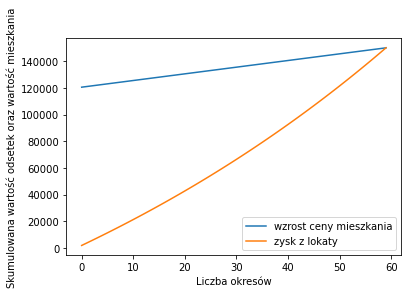

In [201]:
import matplotlib.pyplot as plt

plt.plot(future_apartament_price(12,0.05,5,120000),label='wzrost ceny mieszkania')
plt.plot(invest_table(12,0.12,5,1819),label='zysk z lokaty')
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('Skumulowana wartość odsetek oraz wartość mieszkania')